# 📊  Análise Exploratória (EDA)

In [1]:
# Importar bibliotecas necessárias
# !pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Abrir o ficheiro com ; como separador
df = pd.read_parquet('datasets/consumo_eredes_customizado.parquet')

In [3]:
# mostrar: count, mean, std (desvio padrão), min, 25%, 50%, 75%, max
df['ActiveEnergy(kWh)'].describe()

count    3.719408e+06
mean     1.008758e+04
std      1.155122e+04
min      1.167000e+00
25%      2.680288e+03
50%      6.779958e+03
75%      1.356212e+04
max      1.508790e+05
Name: ActiveEnergy(kWh), dtype: float64

| Estatística          | Significado             |
|----------------------|-------------------------|
| count = 3.719.408    | Total de registos (sem valores negativos) |
| mean = 10.066,10 kWh | Valor médio de consumo por registo |
| std = 11.548,07 kWh  | Desvio padrão (os valores ainda variam bastante) |
| min = 1,17 kWh       | Mínimo consumo positivo registado |
| 25% = 2.660,11 kWh   | 25% dos valores estão abaixo deste valor |
| 50% = 6.758,46 kWh   | Mediana (valor do meio) |
| 75% = 13.542,80 kWh  | 75% dos valores estão abaixo deste valor |
| max = 150.879,00 kWh | Maior valor registado (alto, mas plausível) |

# 📊 Dispersão: Consumo vs Temperatura
###### Ajuda a perceber se há correlação entre temperatura e consumo.

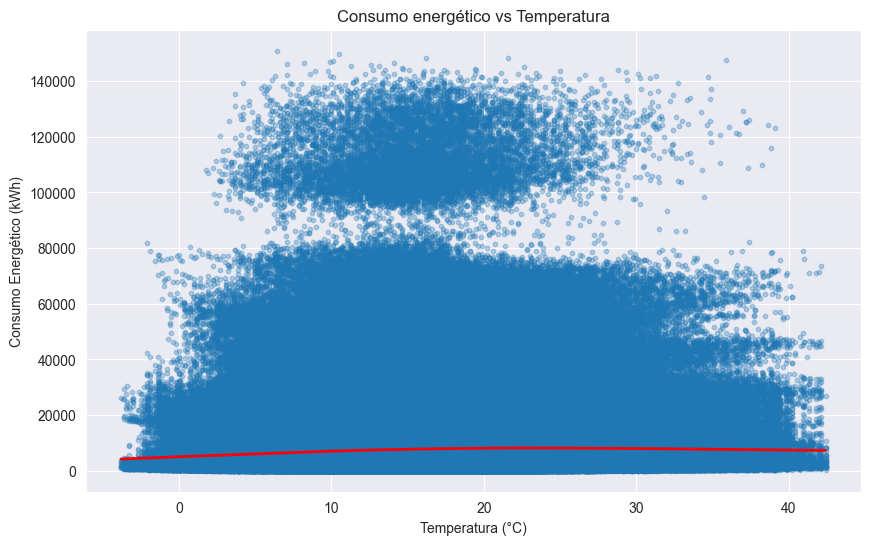

In [4]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="Temperature", y="ActiveEnergy(kWh)", lowess=True, scatter_kws={"s":10, "alpha": 0.3}, line_kws={"color": "red", "lw": 2})
plt.title("Consumo energético vs Temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumo Energético (kWh)")
plt.grid(True)
plt.savefig('figuras/dispersao-consumo-vs-temperatura.png')
plt.show()

# 📈 Interpretação
| Elemento               | Interpretação                                                                                                                                            |
|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Distribuição dos pontos | Existem dois patamares claros de consumo: um inferior e outro mais elevado (acima de 100.000 kWh), indicando perfis distintos de consumidores.           |
| Padrão geral           | A maioria dos consumos concentra-se em temperaturas entre 5 °C e 30 °C. Poucos valores fora deste intervalo.                                             |
| Linha de tendência     | A linha mostra que o consumo energético tende a aumentar ligeiramente com a temperatura até cerca de 20°C, e depois estabiliza ou decresce ligeiramente. |
| Possíveis causas       | - Maior consumo em temperaturas médias pode estar relacionado com aquecimento/arrefecimento moderado.<br/> - Em extremos, pode haver redução de consumo.                                             |

# 📊 Boxplot de consumo por estação do ano
###### Explora variações sazonais no consumo.

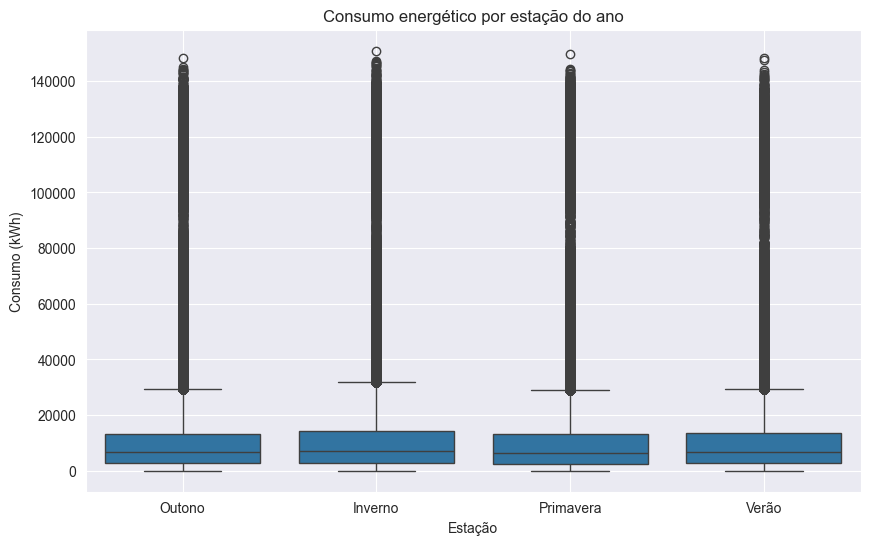

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Season", y="ActiveEnergy(kWh)")
plt.title("Consumo energético por estação do ano")
plt.xlabel("Estação")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.savefig('figuras/boxplot-consumo-por-estacao.png')
plt.show()

# 📈 Interpretação
| Elemento         | Interpretação |
|------------------|---------------|
| Distribuição geral | O consumo é relativamente consistente entre estações. Não há uma variação sazonal muito acentuada na mediana ou no IQR (Intervalo Interquartil).             |
| Mediana          | Sem grandes diferenças – o valor central do consumo permanece estável ao longo das estações.             |
| Outliers         | Há uma grande quantidade de outliers (valores extremamente altos) em todas as estações, indicando consumos muito elevados fora da norma.             |
| Possíveis causas | Pode haver grandes consumidores constantes (empresas, indústrias) ao longo do ano, que mascaram variações sazonais em consumos domésticos.             |

# 📊 Consumo médio vs Densidade Populacional
###### Verifica se há alguma relação entre a densidade e o consumo médio.

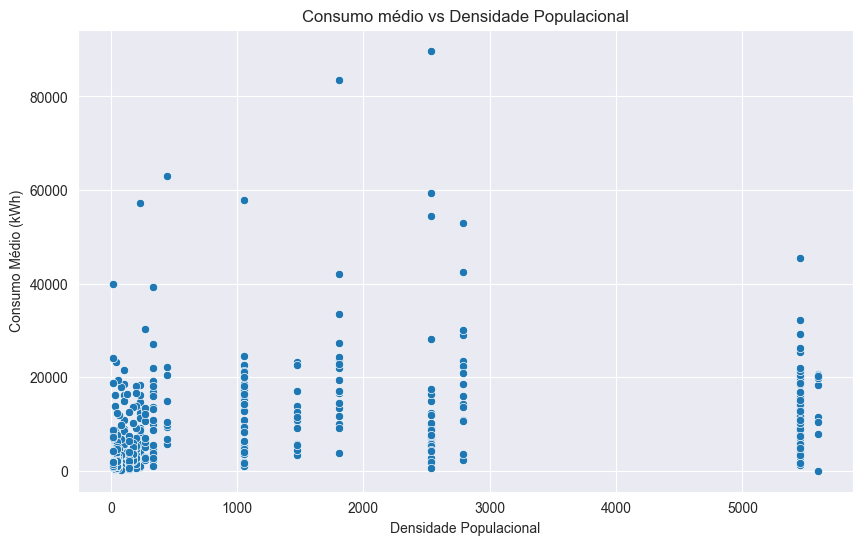

In [6]:
df_grouped = df.groupby("ZipCode").agg({
    "PopulationDensity": "first",
    "ActiveEnergy(kWh)": "mean"
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_grouped, x="PopulationDensity", y="ActiveEnergy(kWh)")
plt.title("Consumo médio vs Densidade Populacional")
plt.xlabel("Densidade Populacional")
plt.ylabel("Consumo Médio (kWh)")
plt.grid(True)
plt.savefig('figuras/consumo-medio-vs-densidade-populacional.png')
plt.show()

# 📈 Interpretação
| Elemento             | Interpretação                                                                                                                                  |
|----------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| Distribuição dos dados | A maioria dos pontos encontra-se concentrada em densidades populacionais baixas (abaixo de 1000 hab/km²), com consumo variado.                 |
| Tendência geral      | Não é visível uma correlação forte entre densidade populacional e consumo médio. O consumo não cresce nem decresce claramente com a densidade. |
| Comportamento anómalo | Existem locais com baixa densidade populacional mas consumo elevado – pode indicar presença de grandes consumidores (zonas industriais, etc.). |
| Espalhamento                   | A variabilidade do consumo é grande, mesmo dentro do mesmo intervalo de densidade – o que sugere que outros fatores afetam mais o consumo.                                                                                                                                              |

# 📊 Consumo energético ao longo do tempo (linha temporal)
###### Uma linha de tendência geral para verificar anomalias ou sazonalidade

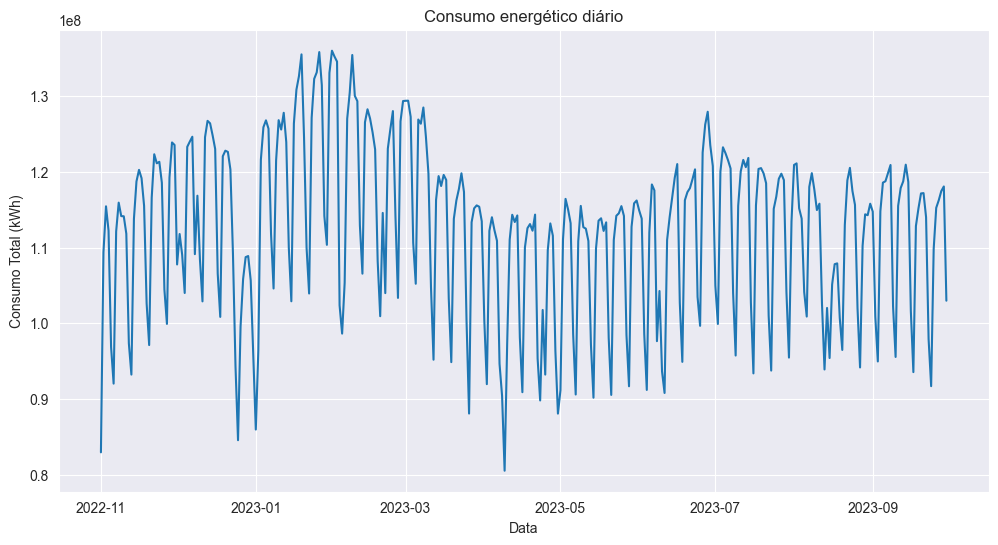

In [7]:
df_daily = df.groupby("Date").agg({"ActiveEnergy(kWh)": "sum"}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x="Date", y="ActiveEnergy(kWh)")
plt.title("Consumo energético diário")
plt.xlabel("Data")
plt.ylabel("Consumo Total (kWh)")
plt.grid(True)
plt.savefig('figuras/consumo-ao-longo-do-tempo.png')
plt.show()

# 📈 Interpretação
| Elemento                    | Interpretação                                                                                                                                |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| Tendência geral	            | Observa-se um padrão sazonal: consumo mais elevado no inverno (especialmente entre dezembro e fevereiro) e mais baixo na primavera e verão.  |
| Picos e quedas	             | Existem oscilações regulares semanais (provavelmente entre dias úteis e fins de semana/feriados).                                            |
| Estabilidade	               | Apesar das flutuações, o consumo mantém-se dentro de um intervalo relativamente constante, exceto nos meses frios (onde há mais picos).      |
| Variação ao longo do tempo	 | Após março de 2023, há uma ligeira redução da média de consumo diário, sugerindo menor necessidade energética durante os meses mais quentes. |


# 📊 Histograma da energia consumida (distribuição geral)
###### Mostra a distribuição dos consumos (e potenciais outliers).

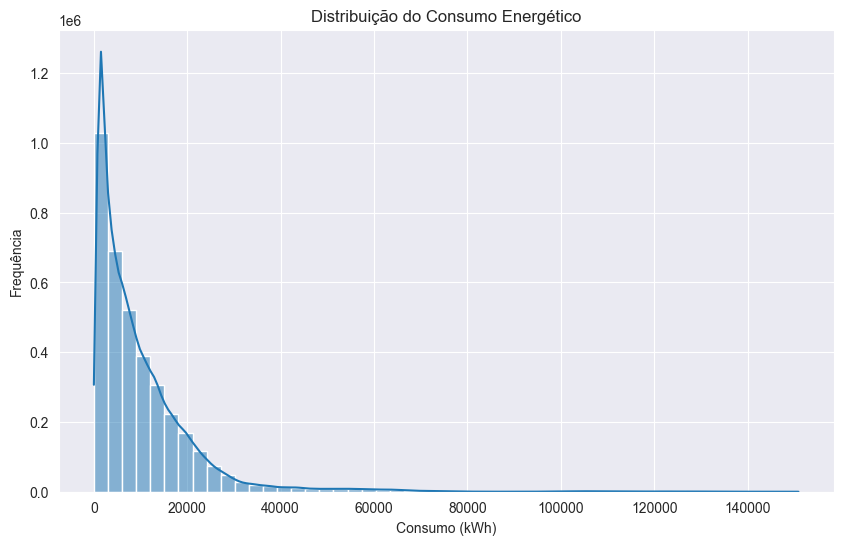

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["ActiveEnergy(kWh)"], bins=50, kde=True)
plt.title("Distribuição do Consumo Energético")
plt.xlabel("Consumo (kWh)")
plt.ylabel("Frequência")
plt.grid(True)
plt.savefig('figuras/histograma-da-energia-consumida.png')
plt.show()

# 📈 Interpretação
| Elemento | Interpretação |
|---------|--|
| Distribuição dos dados | A distribuição é assimétrica à direita (right-skewed), o que significa que:<br/> - A maior parte dos registos de consumo concentra-se nos valores mais baixos (até ~10.000 kWh).<br/>- Existem poucos registos com valores muito elevados, considerados outliers (> 60.000 kWh).|
| Moda (valor mais comum) | O pico do histograma está entre 0 e 5.000 kWh, sendo esta a faixa mais frequente de consumo. |
| Cauda longa	        | A “cauda” da distribuição estende-se até mais de 140.000 kWh, indicando que alguns pontos têm consumos extremamente altos. |

# 📊 Boxplot do consumo energético

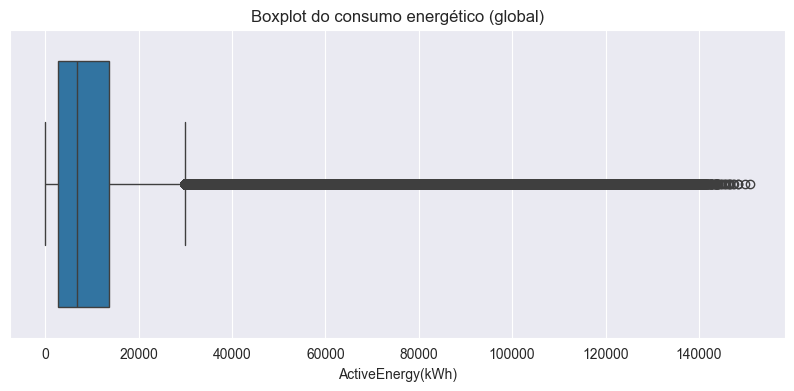

In [9]:
# Boxplot global
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['ActiveEnergy(kWh)'])
plt.title("Boxplot do consumo energético (global)")
plt.savefig('figuras/boxplot-consumo-energetico-global.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação:
- O gráfico mostra que a maioria dos valores está concentrada em consumos mais baixos (até ~13.500 kWh).

- Os consumos acima dos 35.000–40.000 kWh são considerados outliers estatísticos, mesmo que possam ser reais.

- A densidade de outliers é alta, o que indica variabilidade nos dados — pode ser devido a zonas industriais, grandes edifícios ou regiões com maior produção.

# 📊 Boxplot de consumo por código postal (Top 10)

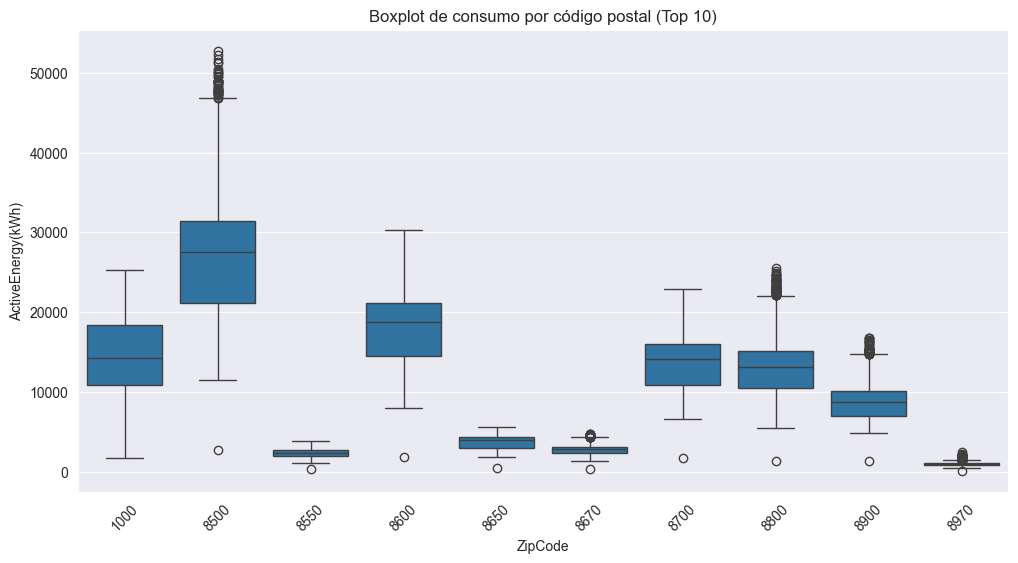

In [10]:
# Boxplots por código postal (comparativo)
# Se tiveres muitos códigos postais, escolhe os top 10 com mais dados:
top_zips = df['ZipCode'].value_counts().head(10).index
df_top = df[df['ZipCode'].isin(top_zips)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='ZipCode', y='ActiveEnergy(kWh)', data=df_top)
plt.title("Boxplot de consumo por código postal (Top 10)")
plt.xticks(rotation=45)
plt.savefig('figuras/boxplot-consumo-por-top10codigopostal.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação:
- A análise por código postal mostra variações significativas na distribuição de consumo energético. Códigos como 2135 e 2520 apresentam médias e máximos mais elevados, o que sugere zonas com maior atividade energética.

- Em contrapartida, códigos como 2485 e 7330 apresentam padrões de consumo mais baixos e consistentes. Outliers estão presentes em quase todas as regiões, indicando a existência de picos ocasionais que podem afetar previsões locais.

In [11]:
# Converter a coluna para datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Garantir que Datetime é o índice
df.set_index('DateTime', inplace=True)

# 📊Consumo total por mês

In [12]:
# Agrupar por ano e mês
df_mensal = df.groupby(['Year', 'Month'])['ActiveEnergy(kWh)'].sum().reset_index()

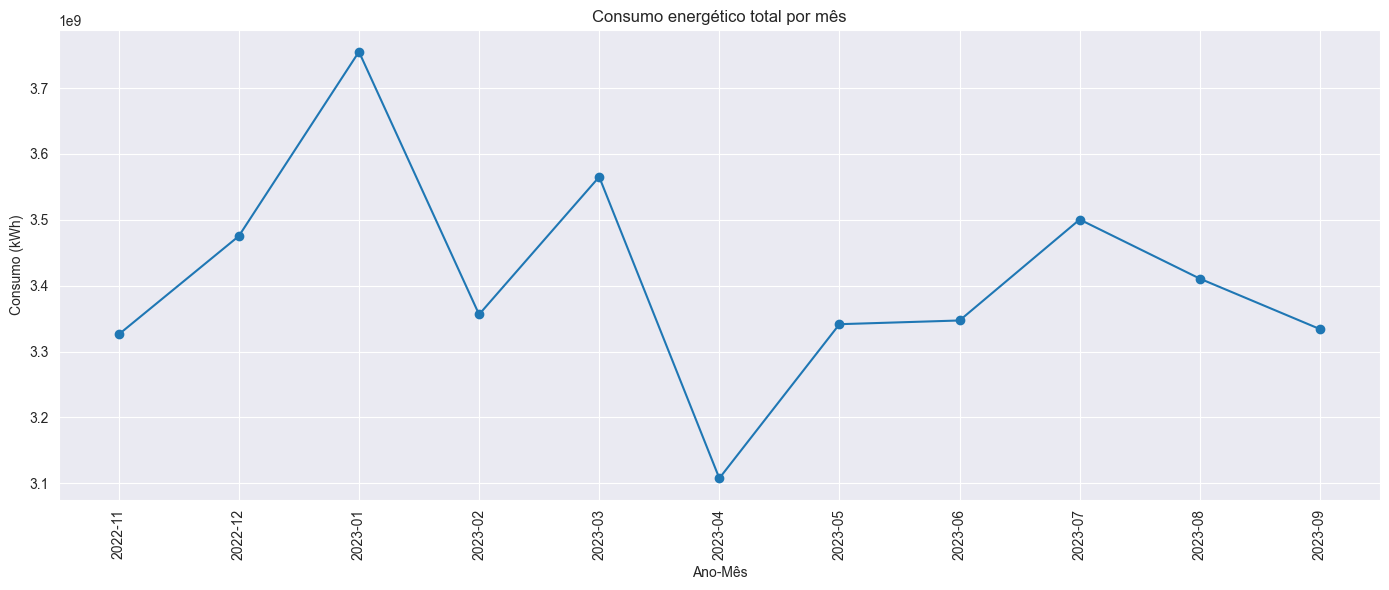

In [13]:
# Cria uma coluna com o label formatado (ex: 2023-07)
df_mensal['Label'] = df_mensal['Year'].astype(str) + '-' + df_mensal['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(df_mensal['Label'], df_mensal['ActiveEnergy(kWh)'], marker='o')
plt.title('Consumo energético total por mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.xticks(rotation=90)  # rotação para caber tudo
plt.tight_layout()
plt.savefig('figuras/consumo-energetico-por-mes.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
- Existe um padrão sazonal claro: o consumo sobe no inverno e desce na primavera.
- Janeiro de 2023 marca o pico de consumo, o que faz sentido (frio, menos luz natural, mais tempo em casa).
- Abril de 2023 é o ponto mais baixo — pode coincidir com clima mais ameno, menos aquecimento, ou feriados prolongados.
- Os valores de verão (junho–agosto) são mais estáveis, mas ainda relativamente elevados — talvez devido a uso de ar condicionado ou turismo.



# 📊Top 10 códigos postais com maior consumo total de energia


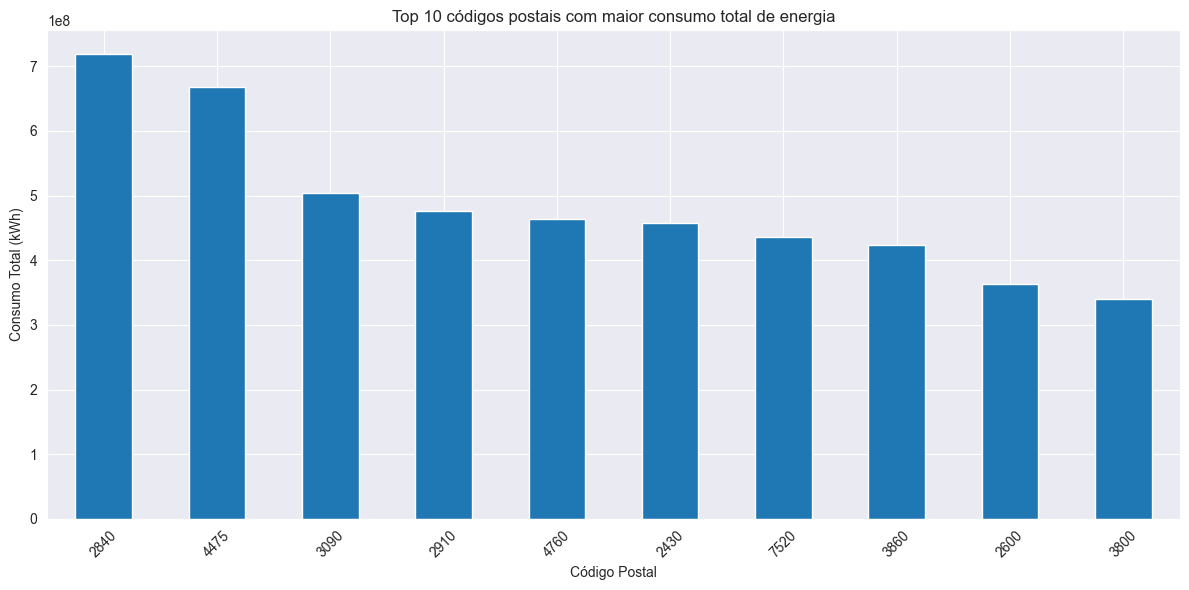

In [14]:
consumo_total_por_zip = df.groupby('ZipCode')['ActiveEnergy(kWh)'].sum().sort_values(ascending=False)

consumo_total_por_zip.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 códigos postais com maior consumo total de energia')
plt.xlabel('Código Postal')
plt.ylabel('Consumo Total (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figuras/top10codigopostal-com-maior-consumo-energia.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
Os maiores consumidores são, sem surpresa, zonas industriais ou urbanas muito densas.

| Codigo Postal | Observação                                                              |
|---------------|-------------------------------------------------------------------------|
| Sines (7520)  | especialmente relevante, por ser uma zona energética estratégica do país |
| Palmela (2910) | destaca-se por abrigar a Autoeuropa — uma das maiores fábricas de Portugal |
| Vila Nova de Famalicão, Marinha Grande, Estarreja e Vila Franca de Xira | conhecidas pela atividade industrial |
| Seixal (2840) | está em 1.º lugar — zona com alta densidade populacional e consumo residencial elevado, além de alguns polos industriais |

# 📊 Consumo medio por hora do dia

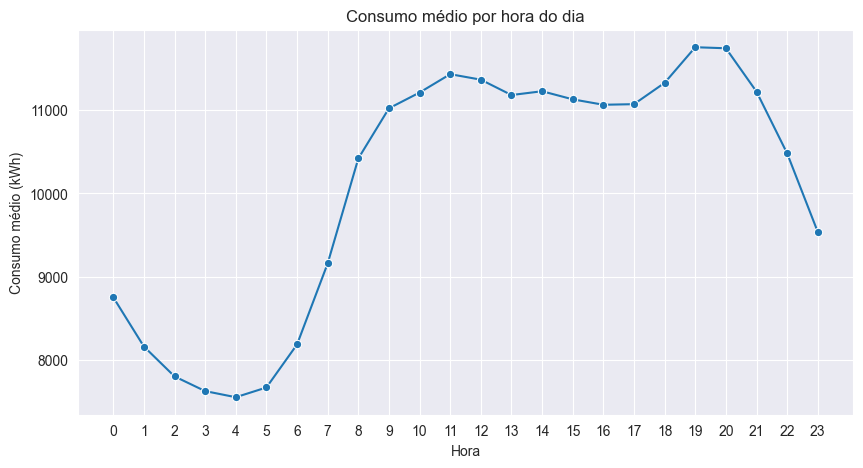

In [15]:
media_por_hora = df.groupby('Hour')['ActiveEnergy(kWh)'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values, marker='o')
plt.title('Consumo médio por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.savefig('figuras/consumo-medio-por-hora-do-dia.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação

| Hora  | Observação                                                                                               |
|-------|----------------------------------------------------------------------------------------------------------|
| 00h–05h | Consumo mais baixo do dia – normal durante o período de sono, onde a maioria das atividades está desligada |
| 06h–08h | Aumento progressivo – início da atividade humana: acordar, luzes, duches, cozinhar, transportes, etc |
| 09h–17h | Manutenção de consumo elevado – período de atividade comercial e industrial |
| 11h–12h | Pico visível – possível sobreposição de consumo doméstico (almoço) + comercial |
| 18h–20h | Maior pico do dia – regresso a casa, cozinhar, iluminação, TV, eletrodomésticos |
| 21h–23h | Queda gradual no final do dia – fim das atividades, início de descanso |

# 📊 Consumo medio por dia da semana

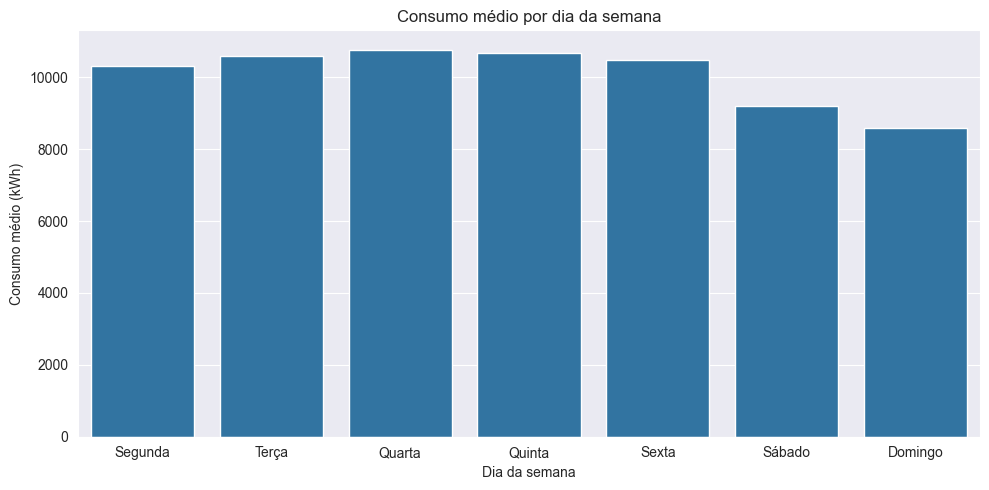

In [16]:
media_por_dia_semana = df.groupby('DayOfTheWeek')['ActiveEnergy(kWh)'].mean()

# Ordenar os dias (opcional, se não estiverem na ordem certa)
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
media_por_dia_semana = media_por_dia_semana.reindex(ordem_dias)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=media_por_dia_semana.index, y=media_por_dia_semana.values)
plt.title('Consumo médio por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('figuras/consumo-medio-por-dia-da-semana.png', dpi=300, bbox_inches='tight')
plt.show()


# 📈 Interpretação

| Dia da semana | Observação |
|--------------|----------|
| 2f a 6f | Consumo elevado e estável – representa os dias úteis, com forte atividade residencial + industrial/comercial |
| 4f a 5f | Picos ligeiramente acima da média – possivelmente os dias mais "ativos" da semana |
| Sábado | Queda notável no consumo – menor atividade laboral e comercial |
| Domingo | Consumo ainda mais baixo – representa o mínimo da semana, comum ao ser um dia de descanso |

# 📊 consumo medio por mês

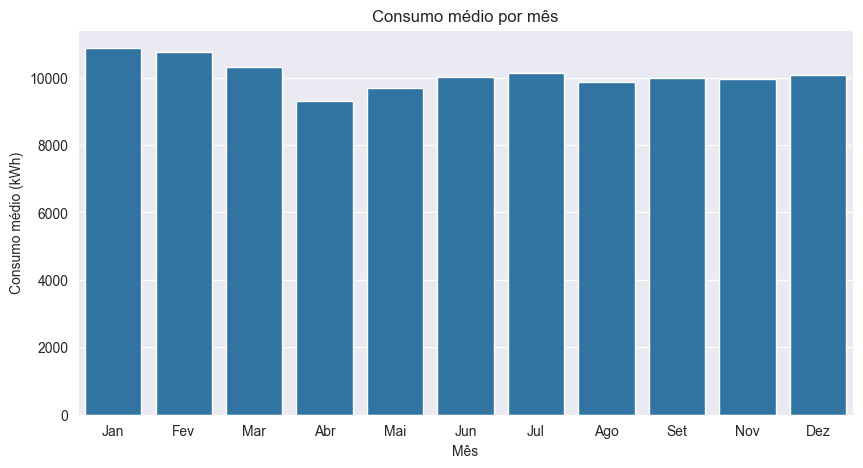

In [17]:
media_por_mes = df.groupby('Month')['ActiveEnergy(kWh)'].mean()

# Opcional: nomes dos meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10,5))
sns.barplot(x=[meses[i-1] for i in media_por_mes.index], y=media_por_mes.values)
plt.title('Consumo médio por mês')
plt.xlabel('Mês')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, axis='y')
plt.savefig('figuras/consumo-medio-por-mes.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
| Mês | Observação |
|--------|-------|
| Jan e Fev | Meses com maior consumo médio – típico dos meses de inverno (aquecimento, luzes ligadas por mais tempo, etc.) |
| Mar | Ligeira redução, com transição para a primavera |
| Abr e Mai | Queda mais acentuada – clima mais ameno, menos necessidade de aquecimento |
| Jun a Set | Consumo médio relativamente estável – verão em Portugal, mas sem aumento brusco |
| Out a Dez | Leve tendência de aumento – aproximação ao inverno novamente |

# 📊 Consumo médio por hora do dia (Top 5 códigos postais com mais consumo)

In [18]:
top5_cp = df.groupby("ZipCode")["ActiveEnergy(kWh)"].sum().nlargest(5).index.tolist() # Agrupar consumo total por código postal
df_top5 = df[df["ZipCode"].isin(top5_cp)] # Filtrar apenas os dados desses 5 CPs
df_top5_grouped = df_top5.groupby(["Hour", "ZipCode"])["ActiveEnergy(kWh)"].mean().reset_index() # Calcular consumo médio por hora do dia para cada CP

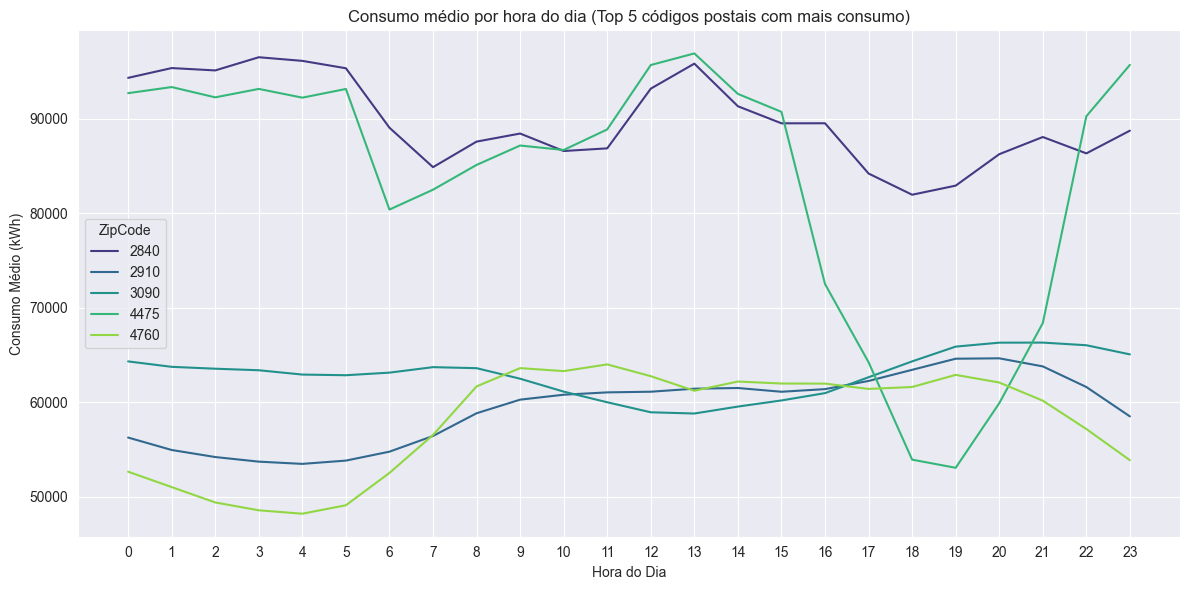

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5_grouped, x="Hour", y="ActiveEnergy(kWh)", hue="ZipCode", palette="viridis")
plt.title("Consumo médio por hora do dia (Top 5 códigos postais com mais consumo)")
plt.xlabel("Hora do Dia")
plt.ylabel("Consumo Médio (kWh)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig('figuras/consumo-medio-por-hora-do-dia-top5-cp-com-mais-consumo.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
| Elemento                 | Interpretação |
|--------------------------|--|
| Padrões Visíveis         | <ul><li>2840 e 4475 têm consumo elevado e dois picos principais: no início da manhã e à tarde.</li><li>4760 mostra um padrão crescente da madrugada até o início da tarde, com ligeira queda à noite.</li><li>3090 e 2910 têm padrões mais estáveis ao longo do dia.</li></ul> |
| Variação ao longo do dia | A maioria dos CPs apresenta menor consumo entre as 2h e as 6h (horas noturnas) e aumentos a partir das 7h/8h, com picos distintos consoante a região. |
| Interpretação Geral      | Este gráfico sugere que diferentes zonas geográficas têm hábitos energéticos distintos — alguns mais industriais/comerciais (com picos durante o dia), outros mais residenciais (consumo mais equilibrado). |

# 📊 Consumo médio por hora do dia (Top 5 códigos postais com menos consumo)

In [20]:
total_por_cp = df.groupby("ZipCode")["ActiveEnergy(kWh)"].sum().sort_values() # Agrupar consumo total por código postal
cp_menos_consumo = total_por_cp.head(5).index # Selecionar os 5 com MENOR consumo
df_filtrado = df[df["ZipCode"].isin(cp_menos_consumo)] # Filtrar o dataset original para esses CPs
df_grouped = df_filtrado.groupby(["ZipCode", "Hour"])["ActiveEnergy(kWh)"].mean().reset_index() # Calcular média de consumo por hora por CP

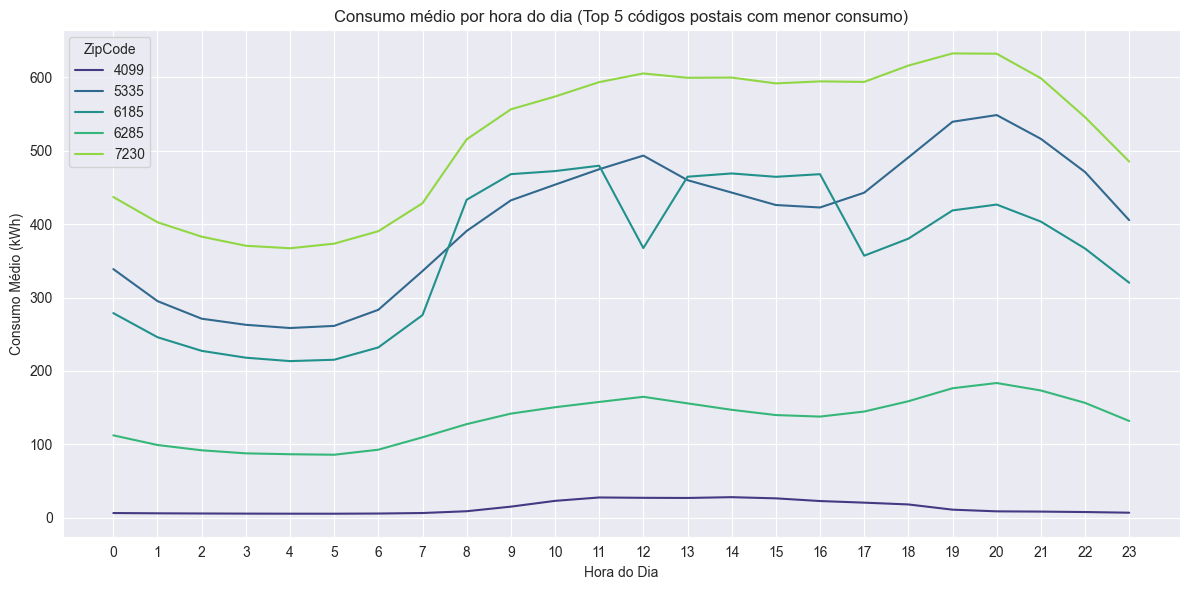

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="Hour", y="ActiveEnergy(kWh)", hue="ZipCode", palette="viridis")
plt.title("Consumo médio por hora do dia (Top 5 códigos postais com menor consumo)")
plt.xlabel("Hora do Dia")
plt.ylabel("Consumo Médio (kWh)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig('figuras/consumo-medio-por-hora-do-dia-top5-cp-com-menor-consumo.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
| Elemento                                         | Interpretação                                                                                                                                                   |
|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Baixo consumo geral                              | Todos os cinco códigos postais apresentam valores médios de consumo energético bastante reduzidos ao longo do dia, comparado com os CPs de maior consumo.       |
| Padrão diário semelhante	                        | A maioria dos CPs segue um padrão típico: menor consumo durante a madrugada e aumento gradual durante o dia, atingindo o pico no final da tarde/início da noite. |
| CP 4099 com consumo mínimo absoluto              | O CP 4099 destaca-se com um consumo muito inferior aos restantes, mantendo-se consistentemente abaixo dos 40 kWh em todas as horas.                             |
| CP 7230 com valores mais elevados dentro do grupo | Apesar de estar neste grupo dos "menores consumidores", o CP 7230 tem um padrão de consumo claramente acima dos outros quatro, chegando aos 600 kWh.            |
| Variações ao longo do dia                        | Existem flutuações em todos os CPs — algumas mais acentuadas (ex: 7230 e 5335) — possivelmente associadas a atividades comerciais ou industriais locais.        |
| Possível perfil residencial	                     | O consumo baixo e os picos típicos durante o dia sugerem um perfil mais residencial e menos industrial para estes CPs.|